In [51]:
# Magic + imports likely common across all notebooks
%load_ext autoreload
%autoreload 2
%matplotlib inline

CMAP = "Blues"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import sys
sys.path.append('/home/jovyan/odc-hub/')
import warnings
warnings.filterwarnings('ignore')
import xarray as xr 
import functools as fct
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce 

# import required datacube modules
from utils_sac.interactive_maps import display_map
from utils_sac.notebook_animation_widgets import create_movie_on_np_array
from utils_sac.plotting import plot_availability

# Water Product Interoperability  

Exploiting multi-modal approaches for generating satellite-derived products can offer spatial-temporal advantages of improved completeness, accuracy and precision.

### Current Water products  

Interoperability is explored across three derived water products from `Sentinel 1`, `Sentinel 2` and `Landsat 8`. The classification and initial data-exploration is conducted in separate notebooks listed below: 

   - `Sentinel 1`- [link]()    
   A thresholding algorthim takes advantage of linear class separability on vv and vh bands to classify water.  
     
     
   - `Landsat 8`- [link]()    
   The Water Observations From Space(WOFS) algorithm is applied to Landsat8 imagery. WOFS uses a decision tree on surface reflectance features.    
   
   
   - `Sentinel 2`- [link]()    
   The Water Observations From Space(WOFS) algorithm is applied to Sentinel 2 imagery. While the original WOFS algorithm was trained and calibrated on Landsat 7 imagery, relatively consistent results are expected from a re-application on Sentinel 2 imagery and are tolerated for the purpose of exploring interoperability.     
   


### Loading Water Products  

In [53]:
# Define dataset file paths
DATA_DIR = Path('/home/shared/geo_demos/wofs_testers')

DATASETS = {
    'l8': DATA_DIR / 'l8_wofs_product_30.nc',
    's1': DATA_DIR / 's1_wofs_product_30.nc',
    's2': DATA_DIR / 's2_wofs_product_30.nc'
}

In [54]:
# Load datasets
datasets = {name: xr.open_dataset(path) for name, path in DATASETS.items()}
print('Loaded datasets: {}'.format(', '.join(datasets.keys())))


Loaded datasets: l8, s1, s2


In [55]:
#created a merged dataset from the three sensors
merged = fct.reduce(lambda ds_a, ds_b: ds_a.merge(ds_b), datasets.values())

## Fiji - Viti Levu


In [56]:
latitudes = (-18.038177490235, -18.220825195313) 
longitudes = (178.24905395508, 178.51547241212)
display_map(latitude = latitudes, longitude = longitudes)

# Annual Summary Products  


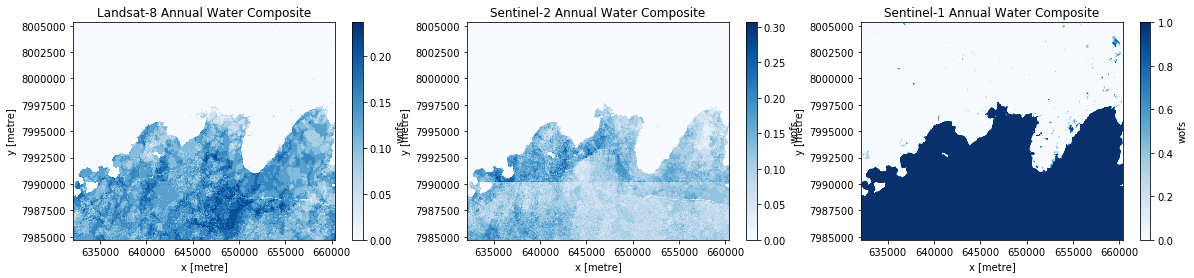

In [57]:
fig, axes = plt.subplots(1,3, figsize = (20,4))

a = datasets["l8"].mean(dim = "time", skipna = True).wofs
b = datasets["s2"].mean(dim = "time", skipna = True).wofs
c = datasets["s1"].mean(dim = "time", skipna = True).wofs

a.plot(ax=axes[0], cmap = CMAP)
axes[0].set_title("Landsat-8 Annual Water Composite")

b.plot(ax=axes[1], cmap = CMAP)
axes[1].set_title("Sentinel-2 Annual Water Composite")

c.plot(ax=axes[2], cmap = CMAP)
axes[2].set_title("Sentinel-1 Annual Water Composite")

plt.show()

# The Sensors

## Sentinel 2    

In [58]:
create_movie_on_np_array(np.flip(datasets["s2"].wofs.values, axis = [1]), text = [*map(str, datasets["s2"].wofs.time.values)], cmap = CMAP)

Text(0.5, 1.0, 'Sentinel-2 Annual Water Composite')

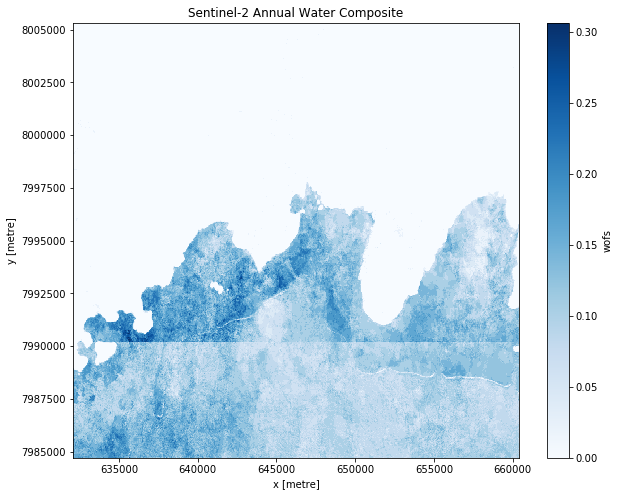

In [59]:
plt.figure(figsize = (10,8))
datasets["s2"].mean(dim = "time", skipna = True).wofs.plot(cmap = CMAP)
plt.title("Sentinel-2 Annual Water Composite")

In [ ]:
monthly_s2 = datasets["s2"].resample(time = "M").mean(skipna = True)
monthly_s2.wofs.plot(col='time',col_wrap=4, cmap = CMAP)

# Landsat 8

In [ ]:
#create_movie_on_np_array(np.flip(datasets["l8"].wofs.values,axis = [1]), text = [*map(str, datasets["l8"].wofs.time.values)], cmap = "Blues")
plt.figure(figsize = (12,10))
datasets["l8"].mean(dim = "time", skipna = True).wofs.plot(cmap = CMAP)

In [ ]:
monthly_l8 = datasets["l8"].resample(time = "M").mean(skipna = True)

In [ ]:
monthly_l8.wofs.plot(col='time',col_wrap=4, cmap = CMAP)

## Sentinel 1 

In [ ]:
create_movie_on_np_array(np.flip(datasets["s1"].wofs.values, axis = [1, 2]), text = [*map(str, datasets["s1"].wofs.time.values)], cmap = CMAP)

In [ ]:
plt.figure(figsize = (12,10))
datasets["s1"].mean(dim = "time", skipna = True).wofs.plot(cmap = CMAP)

In [ ]:
monthly_s1 = datasets["s1"].resample(time = "M").mean(skipna = True)

In [ ]:
monthly_s1.wofs.plot(col='time',col_wrap=4, cmap = CMAP)

# Merged Time Series - Interoperability

In [ ]:
#create_movie_on_np_array(np.flip(merged.wofs.values, axis = [1]), cmap = CMAP)

In [ ]:
plt.figure(figsize = (12,10))
merged.mean(dim = "time", skipna = True).wofs.plot(cmap = CMAP)

### Monthly Merged Product


In [ ]:
fused_resample = merged.resample(time = "M").mean(skipna = True)
fused_resample.wofs.plot(col='time',col_wrap=4, cmap = CMAP)

In [ ]:
#Plot sensor montly availability.

plt.figure(figsize = (15,5))
plt.plot(monthly_s1.time.values,  monthly_s1.mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "blue", label = "S1 Monthly")
plt.scatter(datasets["s1"].time.values,  datasets["s1"].mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "blue")

plt.plot(monthly_s2.time.values,  monthly_s2.mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "green", label = "S2 Monthly")
plt.scatter(datasets["s2"].time.values,  datasets["s2"].mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "green")

plt.plot(monthly_l8.time.values,  monthly_l8.mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "orange", label = "L8 Monthly")
plt.scatter(datasets["l8"].time.values,  datasets["l8"].mean(dim = ["x", "y"]).wofs.values, alpha = 0.4, color = "orange")

plt.plot(fused_resample.time.values,  fused_resample.mean(dim = ["x", "y"], skipna = True).wofs.values, color = "red", label = "fused")

plt.legend()